# Homework 1

This homework is intended as a brief overview of the machine learning process and the various topics you will learn in this class. We hope that this exercise will allow you to put in context the information you learn with us this semester. Don't worry if you don't understand the techniques here (that's what you'll learn this semester!); we just want to show you how you can use sklearn to do simple machine learning. 

## Setup

First let us import some libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

For this homework assignment, we will be using the MNIST dataset. The MNIST data is a collection of black and white 28x28 images, each picturing a handwritten digit. These were collected from digits people write at the post office, and now this dataset is a standard benchmark to evaluate models against used in the machine learning community. This may take some time to download. If this errors out, try rerunning it.

In [2]:
mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')
y = mnist.target.astype('int64')

## Data Exploration

Let us first explore this data a little bit.

In [3]:
print(X.shape, y.shape) 

(70000, 784) (70000,)


The X matrix here contains all the digit pictures. The data is (n_samples x n_features), meaning this data contains 70,000 pictures, each with 784 features (the 28x28 image is flattened into a single row). The y vector contains the label for each digit, so we know which digit (or class - class means category) is in each picture.

Let's try and visualize this data a bit. Change around the index variable to explore more.

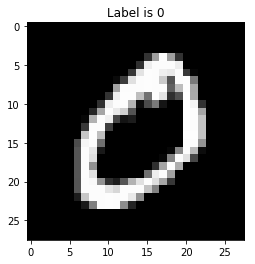

In [4]:
index = 0 #15000, 28999, 67345
image = X[index].reshape((28, 28))
plt.title('Label is ' + str(y[index]))
plt.imshow(image, cmap='gray')

Notice that each pixel value ranges from 0-255. When we train our models, a good practice is to *standardize* the data so different features can be compared more equally. Here we will use a simple standardization, squeezing all values into the 0-1 interval range.

In [5]:
X = X / 255

When we train our model, we want it to have the lowest error. Error presents itself in 2 ways: bias (how close our model is to the ideal model), and variance (how much our model varies with different datasets). If we train our model on a chunk of data, and then test our model on that same data, we will only witness the first type of error - bias. However, if we test on new, unseen data, that will reflect both bias and variance. This is the reasoning behind cross validation.

So, we want to have 2 datasets, train and test, each used for the named purpose exclusively.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Applying Models

Now we will walk you through applying various models to try and achieve the lowest error rate on this data.

Each of our labels is a number from 0-9. If we simply did regression on this data, the labels would imply some sort of ordering of the classes (ie the digit 8 is more of the digit 7 than the digit 3 is, etc. We can fix this issue by one-hot encoding our labels. So, instead of each label being a simple digit, each label is a vector of 10 entries. 9 of those entries are zero, and only 1 entry is equal to one, corresponding to the index of the digit. Let's take a look.

In [7]:
enc = OneHotEncoder(sparse=False)
y_hot = enc.fit_transform(y.reshape(-1, 1))
y_train_hot = enc.transform(y_train.reshape(-1, 1))
y_hot.shape

(70000, 10)

Remember how the first sample is the digit zero? Let's now look at the new label at that index.

In [8]:
y_hot[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Linear Regression

There are 3 steps to build your model: create the model, train the model, then use your model to make predictions). In the sklearn API, this is made very clear. First you instantiate the model (constructor), then you call train it with the `fit` method, then you can make predictions on new data with the `test` method.

First, let's do a basic linear regression.

In [9]:
linear = LinearRegression()
linear.fit(X_train, y_train_hot)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# use trained model to predict both train and test sets
y_train_pred = linear.predict(X_train)
y_test_pred = linear.predict(X_test)

# print accuracies
print('train acc: ', accuracy_score(y_train_pred.argmax(axis=1), y_train))
print('test acc: ', accuracy_score(y_test_pred.argmax(axis=1), y_test))

train acc:  0.8586285714285714
test acc:  0.8539428571428571


Note on interpretability: you can view the weights of your model with `linear.coef_`

### Ridge Regression

Let us try and regularize by adding a penalty term to see if we can get anything better. We can penalize via the L2 norm, aka Ridge Regression.

In [11]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train_hot)
print('train acc: ', accuracy_score(ridge.predict(X_train).argmax(axis=1), y_train))
print('test acc: ', accuracy_score(ridge.predict(X_test).argmax(axis=1), y_test))

train acc:  0.8591619047619048
test acc:  0.8549714285714286


The alpha controls how much to penalize the weights. Play around with it to see if you can improve the test accuracy.

Now you have seen how to use some basic models to fit and evaluate your data. You will now walk through working with more models. Fill in code where needed.

### Logistic Regression

We will now do logistic regression. From now on, the models will automatically one-hot the labels (so we don't need to worry about it).

In [12]:
logreg = LogisticRegression(C=0.01, multi_class='multinomial', solver='saga', tol=0.1)
logreg.fit(X_train, y_train)
print('train acc: ', accuracy_score(logreg.predict(X_train), y_train))
print('test acc: ', accuracy_score(logreg.predict(X_test), y_test))

train acc:  0.9190285714285714
test acc:  0.9158857142857143


Our accuracy has jumped ~5%! Why is this? Logistic Regression is a more complex model - instead of computing raw scores as in linear regression, it does one extra step and squashes values between 0 and 1. This means our model now optimizes over *probabilities* instead of raw scores. This makes sense since our vectors are 1-hot encoded.

The C hyperparameter controls inverse regularization strength (inverse for this model only). Reguralization is important to make sure our model doesn't overfit (perform much better on train data than test data). Play around with the C parameter to try and get better results! You should be able to hit 92%.

### Random Forest

Decision Trees are a completely different type of classifier. They essentially break up the possible space by repeatedly "splitting" on features to keep narrowing down the possibilities. Decision Trees are normally individually very week, so we typically average them together in bunches called Random Forest.

Now you have seen many examples for how to construct, fit, and evaluate a model. Now do the same for Random Forest using the [documentation here](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). You should be able to create one easily without needing to specify any constructor parameters.

In [13]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
print('train acc: ', accuracy_score(rf.predict(X_train), y_train))
print('test acc: ', accuracy_score(rf.predict(X_test), y_test))

train acc:  1.0
test acc:  0.9705714285714285


WOWZA! That train accuracy is amazing, let's see if we can boost up the test accuracy a bit (since that's what really counts). Try and play around with the hyperparameters to see if you can edge out more accuracy (look at the documentation for parameters in the constructor). Focus on `n_estimators`, `min_samples_split`, `max_features`. You should be able to hit ~97%.

### SVC

A support vector classifier is another completely different type of classifier. It tries to find the best separating hyperplane through your data.

The SVC will toast our laptops unless we reduce the data dimensionality. Let's keep 80% of the variation, and get rid of the rest. (This will cause a slight drop in performance, but not by much).

In [14]:
pca = PCA(n_components=0.8, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Great! Now let's take a look at what that actually did.

In [15]:
X_train_pca.shape

(52500, 43)

Remember, before we had 784 (28x28) features! However, PCA found just 43 basis features that explain 80% of the data. So, we went to just 5% of the original input space, but we still retained 80% of the information! Nice.

This [blog post](http://colah.github.io/posts/2014-10-Visualizing-MNIST/) explains dimensionality reduction with MNIST far better than I can. It's a short read (<10 mins), and it contains some pretty cool visualizations. Read it and jot down things you learned from the post or further questions.

* A lot of interesting techniques that seem to have a physics-based interpretation of using repelling particles and springs to cluster data (and reduce dimension).
* Dimensionality reduction methods can become even more useful as more data is used - blog only used ~10,000 data points.

Now let's train our first SVC. The LinearSVC can only find a linear decision boundary (the hyperplane).

In [16]:
lsvc = LinearSVC(dual=False, tol=0.01)
lsvc.fit(X_train_pca, y_train)
print('train acc: ', accuracy_score(lsvc.predict(X_train_pca), y_train))
print('test acc: ', accuracy_score(lsvc.predict(X_test_pca), y_test))

train acc:  0.8930095238095238
test acc:  0.8937714285714286


SVMs are really interesting because they have something called the *dual formulation*, in which the computation is expressed as training point inner products. This means that data can be lifted into higher dimensions easily with this "kernel trick". Data that is not linearly separable in a lower dimension can be linearly separable in a higher dimension - which is why we conduct the transform. Let us experiment.

A transformation that lifts the data into a higher-dimensional space is called a kernel. A polynomial kernel expands the feature space by computing all the polynomial cross terms to a specific degree.

In [17]:
psvc = SVC(kernel='poly', degree=4, tol=0.01, cache_size=4000)
psvc.fit(X_train_pca, y_train)
print('train acc: ', accuracy_score(psvc.predict(X_train_pca), y_train))
print('test acc: ', accuracy_score(psvc.predict(X_test_pca), y_test))

train acc:  0.9958095238095238
test acc:  0.9788


Play around with the degree of the polynomial kernel to see what accuracy you can get.

The RBF kernel uses the gaussian function to create an infinite dimensional space - a gaussian peak at each datapoint. Now fiddle with the `C` and `gamma` parameters of the gaussian kernel below to see what you can get. [Here's documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [18]:
rsvc = SVC(kernel='rbf', tol=0.01, cache_size=4000, C=0.1)
rsvc.fit(X_train_pca, y_train)
print('train acc: ', accuracy_score(rsvc.predict(X_train_pca), y_train))
print('test acc: ', accuracy_score(rsvc.predict(X_test_pca), y_test))

train acc:  0.9684952380952381
test acc:  0.9654857142857143


Isn't that just amazing accuracy?

## Basic Neural Network

You should never do neural networks in sklearn. Use Keras (which we will teach you later in this class), Tensorflow, PyTorch, etc. However, in an effort to keep this homework somewhat cohesive, let us proceed.

Basic neural networks proceed in layers. Each layer has a certain number of nodes, representing how expressive that layer can be. Below is a sample network, with an input layer, one hidden (middle) layer of 50 neurons, and finally the output layer.

In [19]:
nn = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', verbose=1)
nn.fit(X_train_pca, y_train)
print('train acc: ', accuracy_score(nn.predict(X_train_pca), y_train))
print('test acc: ', accuracy_score(nn.predict(X_test_pca), y_test))

Iteration 1, loss = 1.18617327
Iteration 2, loss = 0.40009030
Iteration 3, loss = 0.29049348
Iteration 4, loss = 0.24296563
Iteration 5, loss = 0.21265887
Iteration 6, loss = 0.19064730
Iteration 7, loss = 0.17344766
Iteration 8, loss = 0.16002563
Iteration 9, loss = 0.14879886
Iteration 10, loss = 0.13967411
Iteration 11, loss = 0.13185566
Iteration 12, loss = 0.12532929
Iteration 13, loss = 0.11960835
Iteration 14, loss = 0.11438514
Iteration 15, loss = 0.11014646
Iteration 16, loss = 0.10608603
Iteration 17, loss = 0.10232192
Iteration 18, loss = 0.09890675
Iteration 19, loss = 0.09613683
Iteration 20, loss = 0.09322418
Iteration 21, loss = 0.09043575
Iteration 22, loss = 0.08812768
Iteration 23, loss = 0.08583496
Iteration 24, loss = 0.08374430
Iteration 25, loss = 0.08173327
Iteration 26, loss = 0.07984152
Iteration 27, loss = 0.07801233
Iteration 28, loss = 0.07612476
Iteration 29, loss = 0.07470833
Iteration 30, loss = 0.07319816
Iteration 31, loss = 0.07210546
Iteration 32, los

Fiddle around with the hiddle layers. Change the number of neurons, add more layers, experiment. You should be able to hit 98% accuracy.

Neural networks are optimized with a technique called gradient descent (a neural net is just one big function - so we can take the gradient with respect to all its parameters, then just go opposite the gradient to try and find the minimum). This is why it requires many iterations to converge.

## Turning In

Convert this notebook to a PDF (file -> download as -> pdf via latex) and submit to Gradescope.